# SVM Classification Model for Salary Data 

In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the datasets
train_df=pd.read_csv('C:/Data Science/Assignments/SVM/SalaryData_Train.csv')
test_df=pd.read_csv('C:/Data Science/Assignments/SVM/SalaryData_Test.csv')

In [3]:
train_df.head()
train_df.shape

(30161, 14)

In [4]:
test_df.head()
test_df.shape

(15060, 14)

In [5]:
#Now combine train and test data into one dataset
big_df=train_df.append(test_df,sort=False)
big_df.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [6]:
big_df.shape

(45221, 14)

In [7]:
big_df.info

<bound method DataFrame.info of        age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
15055   33            Private   Bachelors           13        Never-married   
15056   39            Private   Bachelors           13             Divorced   
15057   38            Private   Bachelors           13   Married-civ-spouse   
15058   44            Private   Bachelors           13             Divorced   
15059   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occu

#Feature Engineering and Feature Selection

In [8]:
#Descriptive Statistics
big_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#Feature Engineering - Check for Null missing values
#Check for N/A Values
#big_df.isnull().sum()
big_df.isnull().any()
#Filling all missing values with 0
big_df = big_df.fillna(0)

In [10]:
X = big_df.iloc[:,0:12].values
Y = big_df.iloc[:,13].values
print(X[0:5,])

[[39 ' State-gov' ' Bachelors' 13 ' Never-married' ' Adm-clerical'
  ' Not-in-family' ' White' ' Male' 2174 0 40]
 [50 ' Self-emp-not-inc' ' Bachelors' 13 ' Married-civ-spouse'
  ' Exec-managerial' ' Husband' ' White' ' Male' 0 0 13]
 [38 ' Private' ' HS-grad' 9 ' Divorced' ' Handlers-cleaners'
  ' Not-in-family' ' White' ' Male' 0 0 40]
 [53 ' Private' ' 11th' 7 ' Married-civ-spouse' ' Handlers-cleaners'
  ' Husband' ' Black' ' Male' 0 0 40]
 [28 ' Private' ' Bachelors' 13 ' Married-civ-spouse' ' Prof-specialty'
  ' Wife' ' Black' ' Female' 0 0 40]]


In [11]:
# Let's see how many unique categories we have in this property - occupation
occupation_set = set(big_df['occupation'])
print(occupation_set)

{' Prof-specialty', ' Armed-Forces', ' Sales', ' Exec-managerial', ' Farming-fishing', ' Protective-serv', ' Priv-house-serv', ' Craft-repair', ' Adm-clerical', ' Transport-moving', ' Other-service', ' Tech-support', ' Handlers-cleaners', ' Machine-op-inspct'}


In [12]:
# Let's see how many unique categories we have in this property - native
native_set = set(big_df['native'])
print(native_set)

{' Peru', ' Canada', ' Ecuador', ' Cambodia', ' England', ' Iran', ' Guatemala', ' Ireland', ' Germany', ' Scotland', ' Thailand', ' Trinadad&Tobago', ' France', ' United-States', ' Jamaica', ' China', ' Dominican-Republic', ' Hong', ' Honduras', ' Mexico', ' Haiti', ' Nicaragua', ' Portugal', ' India', ' Cuba', ' South', ' Yugoslavia', ' Greece', ' Italy', ' Hungary', ' Taiwan', ' Vietnam', ' Puerto-Rico', ' Laos', ' Philippines', ' Japan', ' El-Salvador', ' Columbia', ' Outlying-US(Guam-USVI-etc)', ' Poland'}


In [13]:
# Now we classify them as numbers instead of their names.
big_df['occupation'] = big_df['occupation'].map({'?': 0, ' Adm-clerical': 1, ' Armed-Forces': 2, 
                                                       ' Craft-repair': 3, ' Exec-managerial': 4, ' Farming-fishing': 5,
                                                       ' Handlers-cleaners': 6, ' Machine-op-inspct': 7, 
                                                       ' Other-service': 8, ' Priv-house-serv': 9, ' Prof-specialty': 10, 
                                                       ' Protective-serv': 11, ' Sales': 12, ' Tech-support': 13, 
                                                       ' Transport-moving': 14}).astype(int)

In [14]:
# Let's see how many unique categories we have in this property
workclass_set = set(big_df['workclass'])
print(workclass_set)

{' Self-emp-not-inc', ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Private', ' Local-gov', ' Without-pay'}


In [15]:
# Now we classify them as numbers instead of their names.
big_df['workclass'] = big_df['workclass'].map({' State-gov': 0, ' Self-emp-not-inc': 1, 
                                                       ' Federal-gov': 2, ' Self-emp-inc': 3, ' Local-gov': 4,
                                                       ' Private': 5, ' Without-pay': 6}).astype(int)

In [16]:
# Let's see how many unique categories we have in this property
education_set = set(big_df['education'])
print(education_set)

{' 10th', ' 11th', ' HS-grad', ' Assoc-acdm', ' 12th', ' Doctorate', ' 7th-8th', ' 5th-6th', ' Bachelors', ' Masters', ' Some-college', ' 1st-4th', ' Assoc-voc', ' Preschool', ' Prof-school', ' 9th'}


In [17]:
# Now we classify them as numbers instead of their names.
big_df['education'] = big_df['education'].map({' Assoc-voc': 0, ' 1st-4th': 1, 
                                                       ' Doctorate': 2, ' HS-grad': 3, ' 9th': 4,
                                                       ' Preschool': 5, ' Bachelors': 6, 
                                                       ' 11th': 7, ' Some-college': 8, ' 10th': 9, 
                                                       ' Prof-school': 10, ' 12th': 11, ' Masters': 12, 
                                                       ' Assoc-acdm': 13, ' 7th-8th':14, ' 5th-6th':15}).astype(int)

In [18]:
big_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,0,6,13,Never-married,1,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,1,6,13,Married-civ-spouse,4,Husband,White,Male,0,0,13,United-States,<=50K
2,38,5,3,9,Divorced,6,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,5,7,7,Married-civ-spouse,6,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,5,6,13,Married-civ-spouse,10,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
# Again, let's see how many unique categories we have in this property
sex_set = set(big_df['sex'])
print(sex_set)

{' Male', ' Female'}


In [20]:
# Again, let's see how many unique categories we have in this property
salary_set = set(big_df['Salary'])
print(salary_set)

{' <=50K', ' >50K'}


In [21]:
big_df[big_df['Salary'].isnull()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [22]:
# Just transforming Slary to category 0 and 1.
big_df['Salary'] = big_df['Salary'].map({' <=50K': 0, ' >50K': 1}).astype(int)
#final_df = big_df
#Check for missing values
#big_df['Salary'].isnull().any()

In [23]:
big_df.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,5,6,13,Never-married,10,Own-child,White,Male,0,0,40,United-States,0
15056,39,5,6,13,Divorced,10,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,5,6,13,Married-civ-spouse,10,Husband,White,Male,0,0,50,United-States,0
15058,44,5,6,13,Divorced,1,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0
15059,35,3,6,13,Married-civ-spouse,4,Husband,White,Male,0,0,60,United-States,1


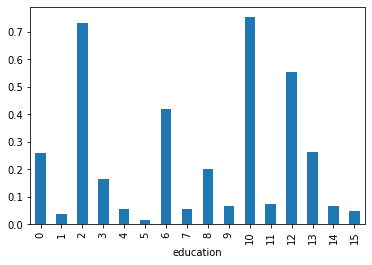

In [24]:
#Plot of Salary V/s Education
big_df.groupby('education').Salary.mean().plot(kind='bar')
#As we can observe, this parameter has significance over Salary

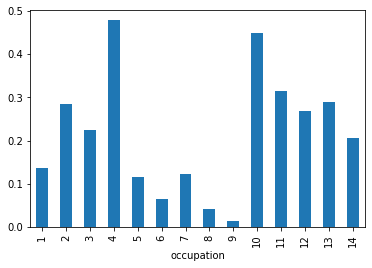

In [25]:
#Plot of Salary V/s Occupation
big_df.groupby('occupation').Salary.mean().plot(kind='bar')
#As we can observe, this parameter has significance over Salary

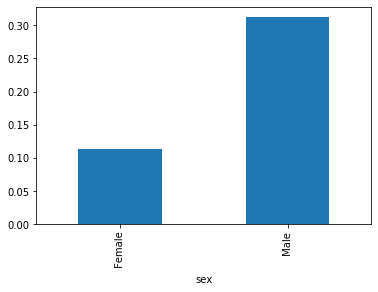

In [26]:
#Plot of Salary V/s sex
big_df.groupby('sex').Salary.mean().plot(kind='bar')
#As we can observe, this parameter has significance over Salary

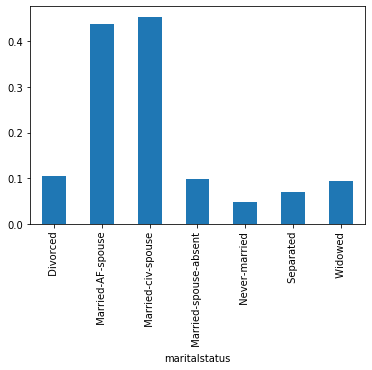

In [27]:
#plot of Salary v/s Marital Status
big_df.groupby('maritalstatus').Salary.mean().plot(kind='bar')
#As we can observe, this parameter has significance over Salary

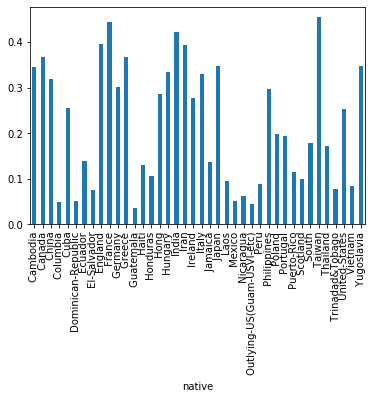

In [28]:
#Plot of Salary v/s native
big_df.groupby('native').Salary.mean().plot(kind='bar')
#As we can observe, there is not much significance of Native over Salary

In [29]:
# Transforming the Sex into 0 and 1
big_df['sex'] = big_df['sex'].map({' Male': 0, ' Female': 1}).astype(int)

In [30]:
big_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,0,6,13,Never-married,1,Not-in-family,White,0,2174,0,40,United-States,0
1,50,1,6,13,Married-civ-spouse,4,Husband,White,0,0,0,13,United-States,0
2,38,5,3,9,Divorced,6,Not-in-family,White,0,0,0,40,United-States,0
3,53,5,7,7,Married-civ-spouse,6,Husband,Black,0,0,0,40,United-States,0
4,28,5,6,13,Married-civ-spouse,10,Wife,Black,1,0,0,40,Cuba,0


In [31]:
# How many unique races we got here?
race_set = set(big_df['race'])
print(race_set)

{' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White'}


In [32]:
big_df['race'] = big_df['race'].map({' White': 0, ' Black': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, 
                                             ' Other': 4}).astype(int)

In [33]:
big_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,0,6,13,Never-married,1,Not-in-family,0,0,2174,0,40,United-States,0
1,50,1,6,13,Married-civ-spouse,4,Husband,0,0,0,0,13,United-States,0
2,38,5,3,9,Divorced,6,Not-in-family,0,0,0,0,40,United-States,0
3,53,5,7,7,Married-civ-spouse,6,Husband,1,0,0,0,40,United-States,0
4,28,5,6,13,Married-civ-spouse,10,Wife,1,1,0,0,40,Cuba,0


In [34]:
# What about maritial status?
mstatus_set = set(big_df['maritalstatus'])
print(mstatus_set)

{' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Married-AF-spouse', ' Divorced', ' Widowed'}


In [35]:
big_df['maritalstatus'] = big_df['maritalstatus'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3,' Divorced': 4, 
                                                            ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [36]:
big_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,0,6,13,5,1,Not-in-family,0,0,2174,0,40,United-States,0
1,50,1,6,13,2,4,Husband,0,0,0,0,13,United-States,0
2,38,5,3,9,4,6,Not-in-family,0,0,0,0,40,United-States,0
3,53,5,7,7,2,6,Husband,1,0,0,0,40,United-States,0
4,28,5,6,13,2,10,Wife,1,1,0,0,40,Cuba,0


In [37]:
# What about relationship?
relation_set = set(big_df['relationship'])
print(relation_set)

{' Other-relative', ' Unmarried', ' Husband', ' Not-in-family', ' Wife', ' Own-child'}


In [38]:
big_df.describe()

,age,workclass,education,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,4.214900,6.144933,10.118463,3.228257,6.969572,0.211207,0.324938,1101.454700,88.548617,40.938038,0.247849
std,13.217981,1.515595,3.494616,2.552909,1.439844,4.026444,0.612882,0.468357,7506.511295,404.838249,12.007640,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,3.000000,9.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,5.000000,6.000000,10.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,5.000000,8.000000,13.000000,5.000000,10.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,14.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


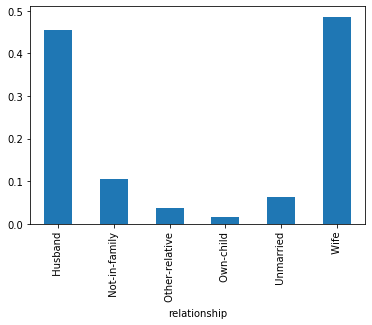

In [39]:
#Plot of Salary over relationship
big_df.groupby('relationship').Salary.mean().plot(kind='bar')
#This parameter is significant

In [40]:
big_df['relationship'] = big_df['relationship'].map({' Unmarried': 0, ' Not-in-family': 1, 
                                               ' Other-relative': 2, ' Own-child': 3,
                                               ' Husband': 4, ' Wife': 5}).astype(int)

In [41]:
#big_df.head()
big_df.values

array([[39, 0, 6, ..., 40, ' United-States', 0],
       [50, 1, 6, ..., 13, ' United-States', 0],
       [38, 5, 3, ..., 40, ' United-States', 0],
       ...,
       [38, 5, 6, ..., 50, ' United-States', 0],
       [44, 5, 6, ..., 40, ' United-States', 0],
       [35, 3, 6, ..., 60, ' United-States', 1]], dtype=object)

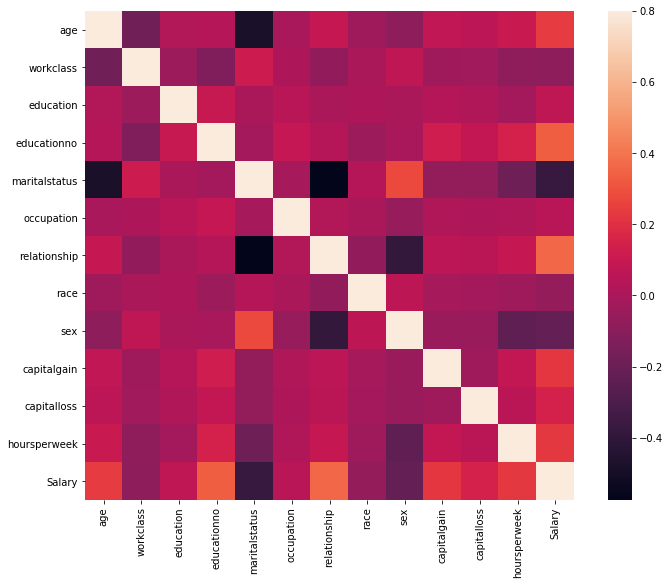

In [42]:
#correlation matrix
corrmat = big_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

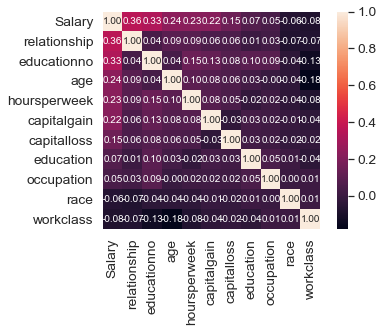

In [43]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Salary')['Salary'].index
cm = np.corrcoef(big_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [44]:
#Data Normalization
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
array = big_df.values
# separate array into input and output components

X = big_df.iloc[:,0:12].values
Y = big_df.iloc[:,13].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# summarize transformed data
set_printoptions(precision=3)
print(X_train[0:11,:])
print(X_test[0:11,:])

[[ 0.038 -0.806 -0.904 -0.436 -0.849 -0.736  0.861 -0.343 -0.694 -0.147
  -0.221 -0.082]
 [ 0.57  -0.806  1.097  1.915 -0.849  0.755  0.861 -0.343 -0.694 13.296
  -0.221  1.588]
 [ 0.57   0.516  1.097  1.915 -0.849  0.755  0.861 -0.343 -0.694 13.296
  -0.221  0.753]
 [-0.265  0.516  0.525 -0.044 -2.237 -1.481 -1.042  1.287  1.44  -0.147
  -0.221 -0.082]
 [ 0.798  0.516 -1.19   2.307 -0.849  0.755  0.861  6.179 -0.694 -0.147
  -0.221  0.753]
 [ 0.266  0.516 -0.904 -0.436  0.539  1.749 -1.042 -0.343 -0.694 -0.147
  -0.221  0.753]
 [-0.797  0.516 -0.046  1.131  1.233  0.258 -1.042 -0.343  1.44  -0.147
  -0.221  0.753]
 [-0.189  0.516  0.525 -0.044 -1.543 -1.481 -1.677  1.287  1.44  -0.147
  -0.221 -0.082]
 [-0.114 -2.128  1.097  1.915 -0.849  0.755  0.861 -0.343 -0.694  0.887
  -0.221  0.753]
 [-0.265  0.516 -1.762  0.348  1.233  0.258 -1.042 -0.343 -0.694 -0.147
  -0.221 -0.499]
 [-0.417  0.516 -0.904 -0.436 -0.849 -0.984  0.861 -0.343 -0.694 -0.147
  -0.221 -0.082]]
[[-0.721  0.516  1.0

In [45]:
#Y = big_df.iloc[:,13].values.reshape(-1,1)
print(Y[0:9,])

[0 0 0 0 0 0 0 1 1]


In [46]:
#####################################################
# Feature Importance with Extra Trees Classifier, Method1
from sklearn.ensemble import ExtraTreesClassifier
# load data
#X_train1 = X_train[:,0:12]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)
#Based on feature importance, I select features all features except Race

[0.227 0.044 0.033 0.1   0.085 0.094 0.109 0.021 0.027 0.099 0.032 0.129]


In [50]:
#####################################################
# Feature Importance Method2
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
model=SelectFromModel(Lasso(alpha=0.005,random_state=5))
model.fit(X_train,y_train)
model.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

In [58]:
# SVM Model building
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

kfold = KFold(n_splits=15, random_state=None)
model = SVC(C=10, kernel='linear', random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#results = cross_val_score(model, X, Y, cv=kfold)
#print(results.mean())



# Plot traning and test data
#plot_data(X_train, y_train, X_test, y_test)



In [55]:
#from mlxtend.plotting import plot_decision_regions
#plot_decision_regions(X_train, y_train, clf=model)

In [59]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_pred)
print(cn)

[[9546  683]
 [1467 1871]]


In [60]:
#get Model Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8415272352030663

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.1, 1, 10, 100], 'kernel': ['linear']}]
              {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7]}] 

grid_search = GridSearchCV(estimator=model, 
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)

grid_search = grid_search.fit(X_train,y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)


In [61]:
#Best Fit Model
model = SVC(C=10,kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [62]:
#Print Confusion Matrix
cn = confusion_matrix(y_test, y_pred)
print(cn)
#Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

[[9557  672]
 [1494 1844]]


0.8403479029999263